In [30]:
from pathlib import Path
from itertools import chain

import numpy as np
from PIL import Image
import tqdm
from matplotlib import pyplot as plt
%matplotlib inline

In [31]:
paths = list(Path('../../_data/').glob('*/*.jpg'))
images = [(p, Image.open(str(p)).convert('RGB')) for p in tqdm.tqdm(paths)]

100%|██████████| 101670/101670 [02:48<00:00, 604.36it/s]


In [47]:
images_by_path = dict(images)

In [32]:
images_64 = [(p, im.resize((64, 64))) for p, im in tqdm.tqdm(images)]

100%|██████████| 101670/101670 [00:09<00:00, 10916.41it/s]


In [49]:
def find_similar(path):
    img = Image.open(path).convert('RGB')
    img_64 = img.resize((64, 64))
    img_64_int = np.array(img_64, dtype=np.int16)
    path = min(images_64_int, key=lambda x: np.abs(x[1] - img_64_int).sum())[0]
    return path

PosixPath('../../_data/test-jpg-additional/file_15989.jpg')

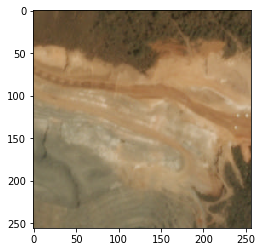

In [65]:
up_path = Path('../../_data/test-jpg-additional/file_15989.jpg') # find_similar('up.png')
plt.imshow(Image.open(str(up_path)))
up_path

PosixPath('../../_data/test-jpg-additional/file_62.jpg')

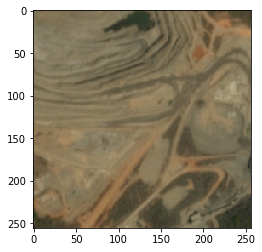

In [66]:
center_path = Path('../../_data/test-jpg-additional/file_62.jpg') # find_similar('center.png')
plt.imshow(Image.open(str(center_path)))
center_path

PosixPath('../../_data/train-jpg/train_17041.jpg')

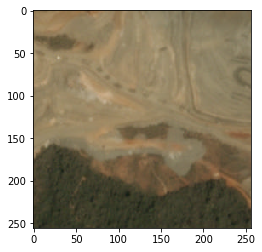

In [67]:
left_path = Path('../../_data/train-jpg/train_17041.jpg')  # find_similar('left.png')
plt.imshow(Image.open(str(left_path)))
left_path

PosixPath('../../_data/test-jpg-additional/file_10601.jpg')

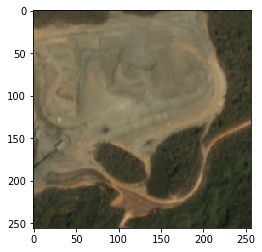

In [68]:
right_path = Path('../../_data/test-jpg-additional/file_10601.jpg')  # find_similar('right.png')
plt.imshow(Image.open(str(right_path)))
right_path

PosixPath('../../_data/test-jpg/test_34866.jpg')

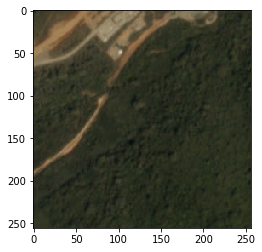

In [69]:
bottom_path = Path('../../_data/test-jpg/test_34866.jpg') # find_similar('bottom.png')
plt.imshow(Image.open(str(bottom_path)))
bottom_path

In [70]:
bottom_im = images_by_path[bottom_path]
center_im = images_by_path[center_path]
right_im = images_by_path[right_path]
left_im = images_by_path[left_path]
up_im = images_by_path[up_path]

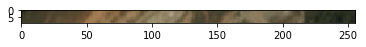

In [58]:
plt.imshow(bottom_im.crop((0, 0, 256, 10)))

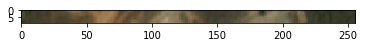

In [64]:
plt.imshow(center_im.crop((0, 256 - 10, 256, 256)))

In [107]:
bottoms = [np.array(im.crop((0, 256 - 5, 256, 256))).ravel().astype(np.float32) for _, im in images]

In [78]:
bottoms_arr = np.array(bottoms)

In [108]:
b_top = np.array(bottom_im.crop((0, 0, 256, 5))).astype(np.float32).ravel()

In [111]:
%%time
distances_l1 = np.abs(bottoms_arr - b_top).mean(axis=1)

CPU times: user 724 ms, sys: 2.65 s, total: 3.37 s
Wall time: 3.37 s


In [112]:
%%time
distances_l2 = ((bottoms_arr - b_top) ** 2).mean(axis=1)

CPU times: user 696 ms, sys: 332 ms, total: 1.03 s
Wall time: 1.03 s


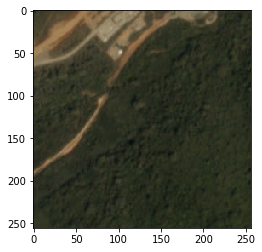

In [95]:
plt.imshow(bottom_im)

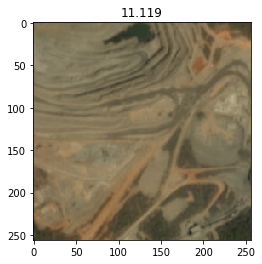

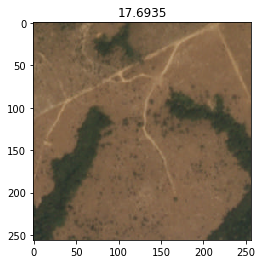

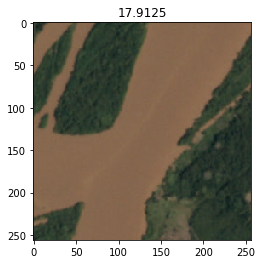

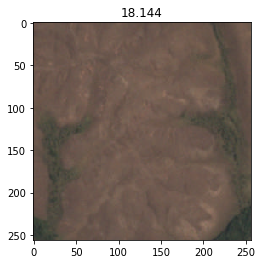

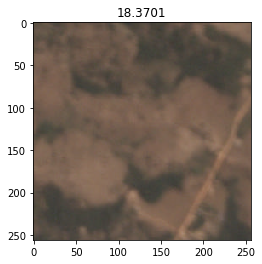

In [113]:
for idx in distances_l1.argsort()[:5]:
    plt.figure()
    plt.title(str(distances_l1[idx]))
    plt.imshow(Image.open(images[idx][0]))

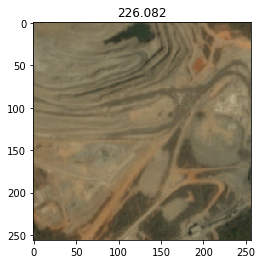

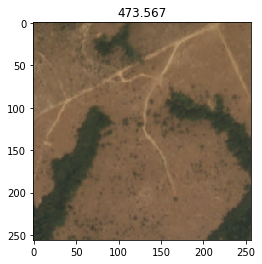

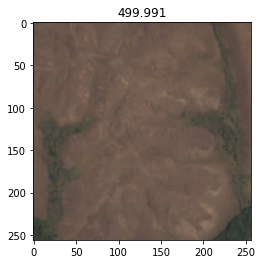

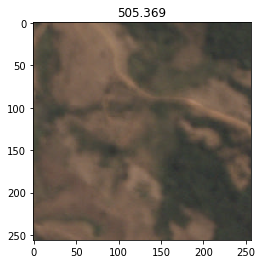

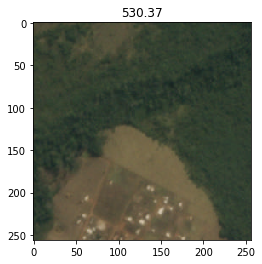

In [114]:
for idx in distances_l2.argsort()[:5]:
    plt.figure()
    plt.title(str(distances_l2[idx]))
    plt.imshow(Image.open(images[idx][0]))